# Applied Data Science
# Natural Gas Price Prediction using Machine Learning Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Loading

In [2]:
dataset = pd.read_csv('../data/daily_csv.csv')

In [3]:
dataset.head(10)

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
5,1997-01-14,4.01
6,1997-01-15,4.34
7,1997-01-16,4.71
8,1997-01-17,3.91
9,1997-01-20,3.26


## Data Preprocessing
### Analysing Data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5938 non-null   object 
 1   Price   5937 non-null   float64
dtypes: float64(1), object(1)
memory usage: 92.9+ KB


In [5]:
# Statistical Analysis
dataset.describe()

,Price
count,5937.00000
mean,4.18923
std,2.19121
min,1.05000
25%,2.66000
50%,3.54000
75%,5.24000
max,18.48000


In [6]:
dataset.shape

(5938, 2)

In [7]:
dataset.dtypes

Date      object
Price    float64
dtype: object

### Feature Engineering - Feature Extraction
##### Splitting the Date column into 3 different integer columns respectly Year, Month and Day

In [8]:
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['day'] = pd.DatetimeIndex(dataset['Date']).day

In [9]:
dataset.head()

,Date,Price,year,month,day
0,1997-01-07,3.82,1997,1,7
1,1997-01-08,3.80,1997,1,8
2,1997-01-09,3.61,1997,1,9
3,1997-01-10,3.92,1997,1,10
4,1997-01-13,4.00,1997,1,13


### Feature Selection

In [10]:
# dropping the Date Column
dataset.drop('Date', axis=1, inplace=True)
dataset.head()

,Price,year,month,day
0,3.82,1997,1,7
1,3.80,1997,1,8
2,3.61,1997,1,9
3,3.92,1997,1,10
4,4.00,1997,1,13


### Handling Missing Values

In [11]:
dataset.isnull().any()

Price     True
year     False
month    False
day      False
dtype: bool

From this we could identify that the PRICE column contains null values. So replace them with the mean of the column

d:\Users\Python\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Price')

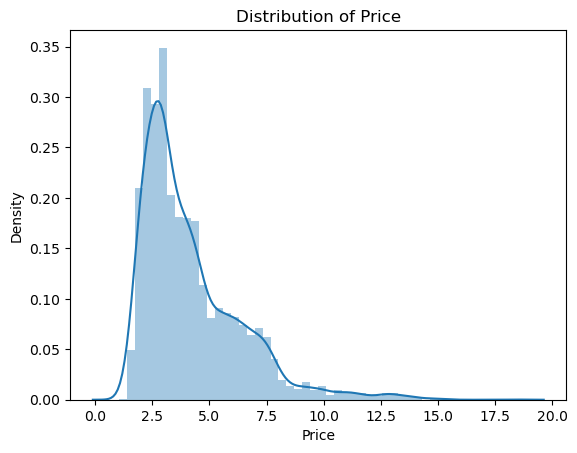

In [12]:
sns.distplot(dataset['Price'].dropna())
plt.title("Distribution of Price")

In [13]:
dataset['Price'].fillna(dataset['Price'].mean(), inplace=True)
dataset.head()

,Price,year,month,day
0,3.82,1997,1,7
1,3.80,1997,1,8
2,3.61,1997,1,9
3,3.92,1997,1,10
4,4.00,1997,1,13


In [14]:
# Re-checking for the NULL values
dataset.isnull().any()

Price    False
year     False
month    False
day      False
dtype: bool

We have successfully replaced the missing values of the PRICE column

In [15]:
dataset.describe()

,Price,year,month,day
count,5938.000000,5938.000000,5938.000000,5938.000000
mean,4.189230,2008.366959,6.468003,15.712193
std,2.191026,6.825348,3.415981,8.742158
min,1.050000,1997.000000,1.000000,1.000000
25%,2.660000,2002.000000,4.000000,8.000000
50%,3.540000,2008.000000,6.000000,16.000000
75%,5.240000,2014.000000,9.000000,23.000000
max,18.480000,2020.000000,12.000000,31.000000


### Handling Outliers

d:\Users\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Users\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Users\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Users\Python\anaconda3\li

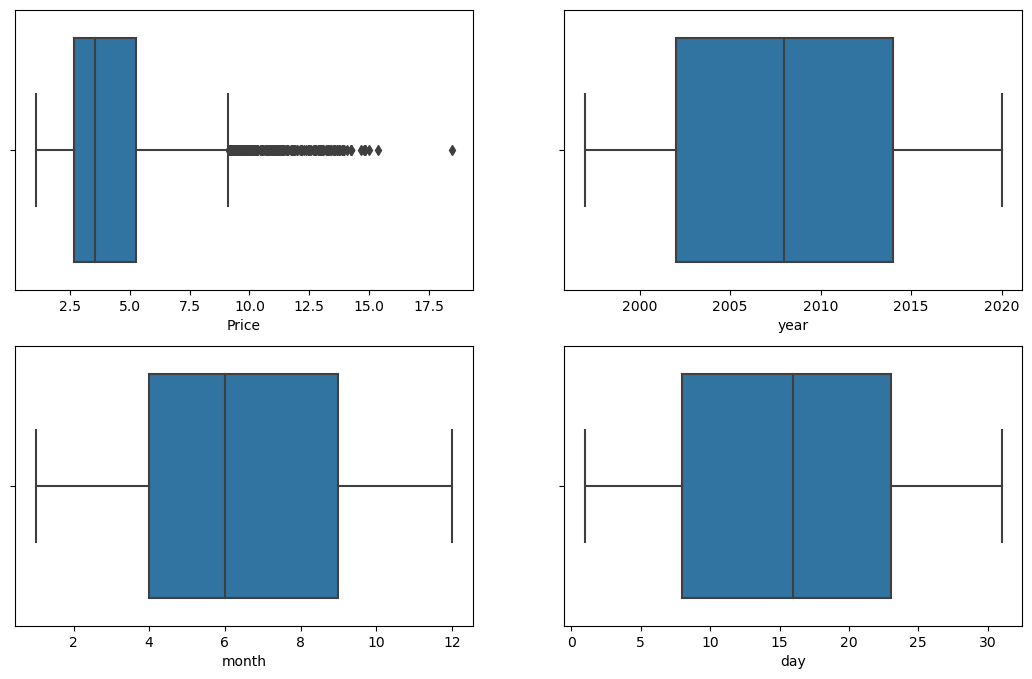

In [16]:
plt.figure(figsize=(13,8))
l = ['Price','year','month','day']
for i in range(len(l)):
    plt.subplot(2,2,i+1)
    sns.boxplot(dataset[l[i]])

This Price column contains outliers. So, we are removing them using IQR method

In [17]:
from scipy import stats
z = np.abs(stats.zscore(dataset))
z

,Price,year,month,day
0,0.168534,1.665544,1.600847,0.996656
1,0.177662,1.665544,1.600847,0.882258
2,0.264387,1.665544,1.600847,0.767861
3,0.122889,1.665544,1.600847,0.653463
4,0.086373,1.665544,1.600847,0.310269
...,...,...,...,...
5933,0.894282,1.704531,0.448517,1.225452
5934,0.880589,1.704531,0.448517,1.111054
5935,0.930798,1.704531,0.448517,0.996656
5936,0.917104,1.704531,0.448517,0.653463


In [18]:
print('Outliers')
print(np.where(z>3))
len(np.where(z>3)[0])

Outliers
(array([1534, 1535, 1538, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171,
       2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184,
       2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195,
       2196, 2197, 2198, 2199, 2200, 2209, 2210, 2213, 2214, 2215, 2216,
       2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227,
       2228, 2229, 2230, 2231, 2232, 2233, 2234, 2820, 2821, 2822, 2825,
       2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836,
       2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847,
       2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858,
       2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869,
       2870, 2871, 2872, 2873, 2874, 2875, 2876], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

117

The dataset contains only 117 rows of Outliers, Thus we can just remove them instead of replacing.

In [19]:
dataset_updated = dataset[(z<=3).all(axis=1)]
dataset_updated

,Price,year,month,day
0,3.82,1997,1,7
1,3.80,1997,1,8
2,3.61,1997,1,9
3,3.92,1997,1,10
4,4.00,1997,1,13
...,...,...,...,...
5933,2.23,2020,8,5
5934,2.26,2020,8,6
5935,2.15,2020,8,7
5936,2.18,2020,8,10


In [20]:
dataset_updated.shape

(5821, 4)

## Data Visualization

Text(0.5, 1.0, 'Price based on the Year')

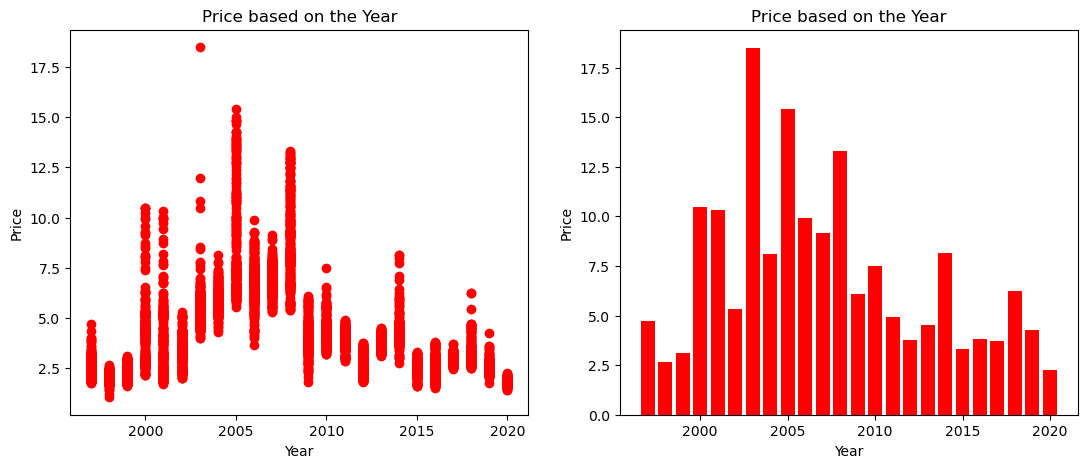

In [21]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.scatter(x=dataset['year'], 
                y=dataset['Price'],
               color='red')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price based on the Year')

plt.subplot(1,2,2)
plt.bar(x=dataset['year'], 
        height=dataset['Price'],
               color='red')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price based on the Year')

in between 2000-2005, the price of the natural gas was at its high.

Text(0.5, 1.0, 'Price based on the Month')

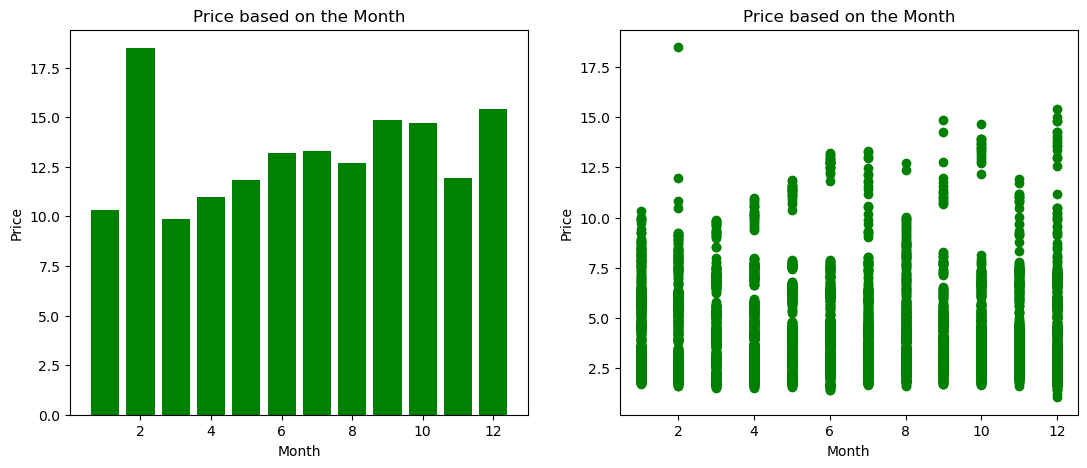

In [22]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.bar(x=dataset['month'], 
        height=dataset['Price'],
               color='green')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price based on the Month')

plt.subplot(1,2,2)
plt.scatter(x=dataset['month'], 
            y=dataset['Price'],
               color='green')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price based on the Month')

From the overall data, the 2nd month has the highest price rate.

Text(0.5, 1.0, 'Price based on Day of the month')

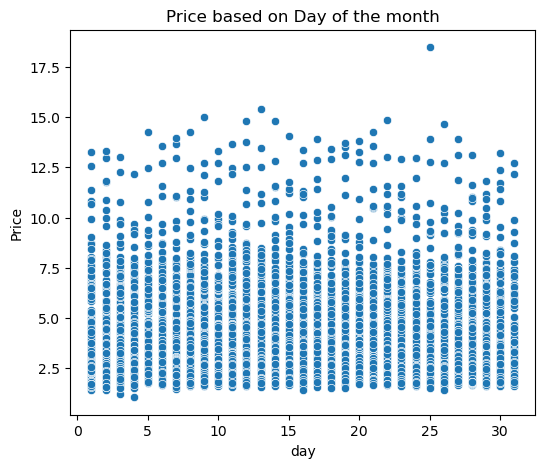

In [23]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=dataset['day'], 
                y=dataset['Price'])
plt.title('Price based on Day of the month')

Text(0.5, 1.0, 'Year wise Price')

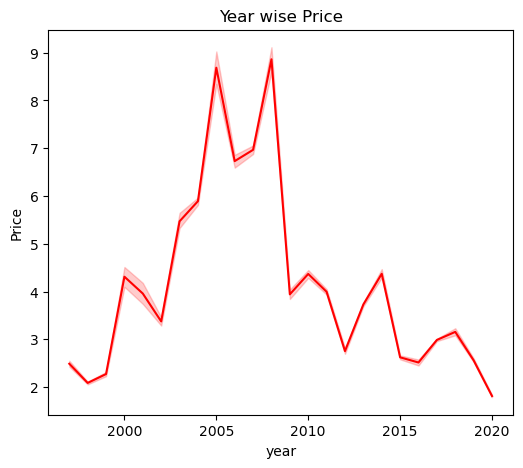

In [24]:
# Line Graph - Trend Line for Time Series
plt.figure(figsize=(6,5))
sns.lineplot(x='year', y='Price', 
             data=dataset, color='red')
plt.title('Year wise Price')

Text(0.5, 1.0, 'Month wise Price')

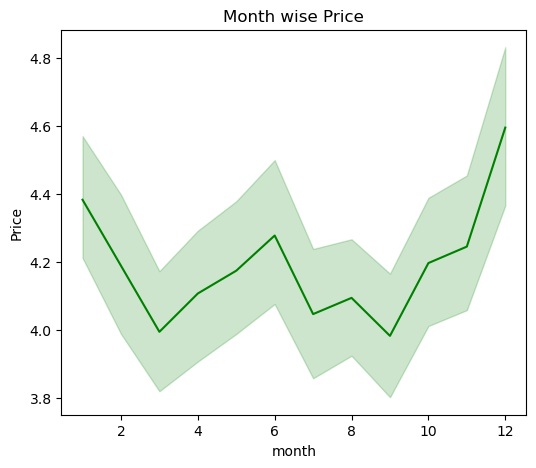

In [25]:
plt.figure(figsize=(6,5))
sns.lineplot(x='month', y='Price', 
             data=dataset, color='green')
plt.title('Month wise Price')

Text(0.5, 1.0, 'Day wise Price')

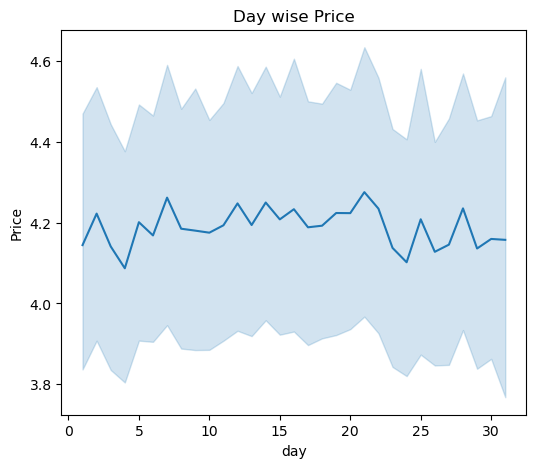

In [26]:
plt.figure(figsize=(6,5))
sns.lineplot(x='day', y='Price', 
             data=dataset)
plt.title('Day wise Price')

<AxesSubplot:>

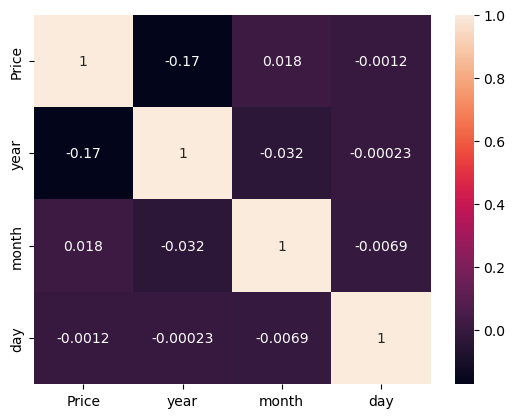

In [27]:
sns.heatmap(dataset.corr(), annot=True)

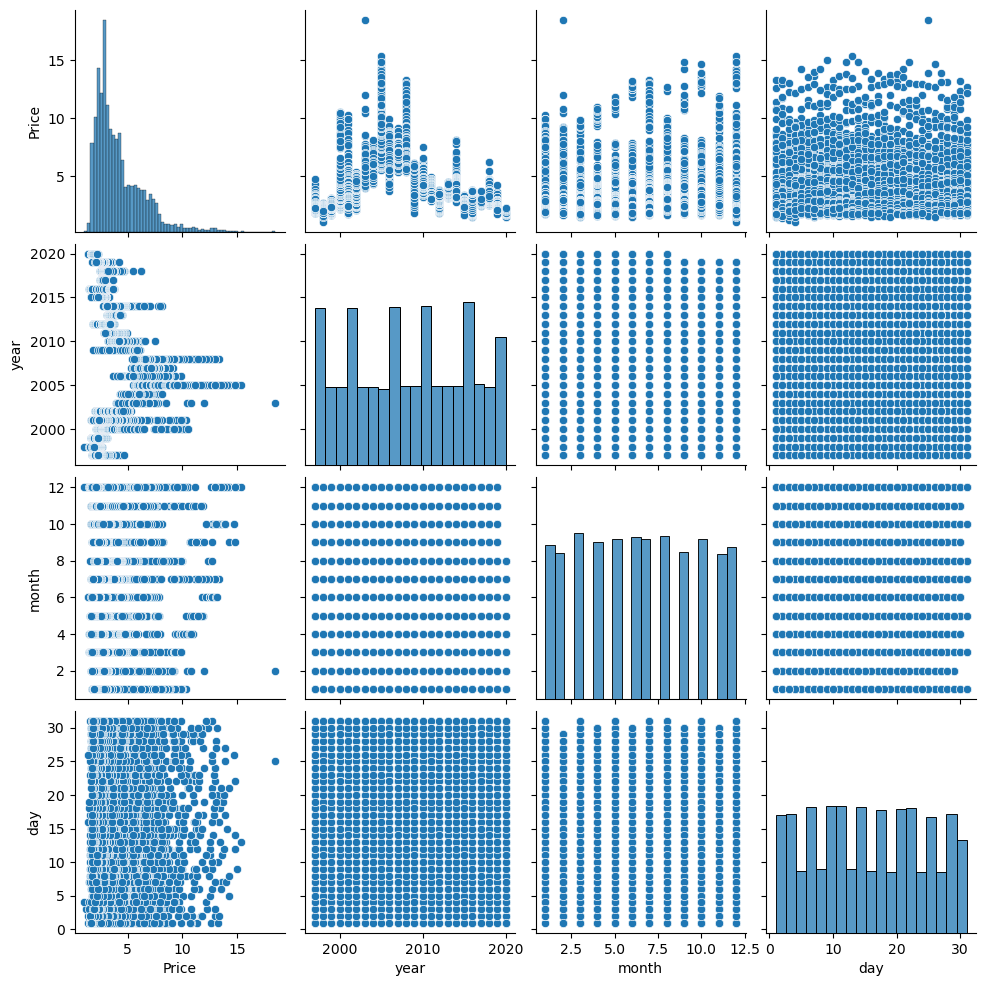

In [28]:
# Pair Plot
sns.pairplot(dataset)
plt.show()

## Splitting the Dataset into Train and Test

In [29]:
X = dataset.iloc[:,1:4].values
y = dataset.iloc[:,0:1].values
X

array([[1997,    1,    7],
       [1997,    1,    8],
       [1997,    1,    9],
       ...,
       [2020,    8,    7],
       [2020,    8,   10],
       [2020,    8,   11]], dtype=int64)

In [30]:
y

array([[3.82],
       [3.8 ],
       [3.61],
       ...,
       [2.15],
       [2.18],
       [2.19]])

### Encoding
There are no Categorical data available in our dataset. Thus, we can skip this step of preprocessing.

### Train - Test Split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                y, test_size=0.2, random_state=42)

In [32]:
X_train.shape, X_test.shape

((4750, 3), (1188, 3))

## Model Building

Since our dataset predicts the numerical output, we can use any of the Regression Models.

### Decision Tree Regressor Model

In [33]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
dt_pred = dt.predict(X_test)
dt_pred

array([ 1.98, 11.4 ,  6.81, ...,  2.55,  7.56,  4.23])

## Random Forest Regression Model

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, np.ravel(y_train))

RandomForestRegressor()

In [36]:
rf_pred = rf.predict(X_test)
rf_pred

array([ 1.9872, 11.449 ,  6.8703, ...,  2.5126,  7.501 ,  4.2513])

## SVM Regression

In [37]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, np.ravel(y_train))

SVR()

In [38]:
svr_pred = svr.predict(X_test)
svr_pred

array([3.54472465, 3.59608198, 3.59972399, ..., 3.6348408 , 3.60044548,
       3.62283753])

### Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
lr_pred = lr.predict(X_test)
lr_pred

array([[3.46195562],
       [4.20983284],
       [4.2433934 ],
       ...,
       [4.74834873],
       [4.26469193],
       [4.61571924]])

### Finding the R2 - Score for each models created above

In [43]:
from sklearn.metrics import r2_score
print('R2 Scores:\n')

print("Decision Tree:\t%.5f"%r2_score(y_test, dt_pred))
print("Linear Regression:%.5f"%r2_score(y_test, lr_pred))
print("Random Forest:\t%.5f"%r2_score(y_test, rf_pred))
print("Support Vector:\t%.5f"%r2_score(y_test, svr_pred))

R2 Scores:

Decision Tree:	0.97777
Linear Regression:0.01641
Random Forest:	0.97275
Support Vector:	-0.04932


From these, we could identify that, the DECISION TREE REGRESSION gives the better R2-Score. Thus, we can say this is the best model

#### Since Linear Regression is not robust to outliers and not standard values, we have to standardize the values

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [45]:
X = dataset_updated.iloc[:,1:4].values
y = dataset_updated.iloc[:,0:1].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                y, test_size=0.2, random_state=42)

In [47]:
X_train = sc.fit_transform(X_train)
X_train

array([[-0.20963424,  0.46361852,  1.51511151],
       [-0.35586001,  1.05003738,  0.48286697],
       [-1.52566618,  1.05003738,  1.51511151],
       ...,
       [ 1.39884924, -0.7092192 , -1.46692828],
       [ 1.39884924,  1.34324682,  1.17103   ],
       [-1.23321464, -0.12280034, -0.3199899 ]])

In [48]:
X_test = sc.fit_transform(X_test)
X_test

array([[-1.3179493 , -1.01336886, -0.72361645],
       [-0.60953787,  0.43128939, -1.28962501],
       [ 0.80728499, -0.72443721, -1.51602844],
       ...,
       [ 1.23233185,  1.29808434,  0.97440926],
       [-1.45963159, -1.59123216, -0.95001987],
       [-1.45963159, -0.43550556,  1.54041782]])

In [49]:
# training the Linear Regressor with the standardised values
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred

array([[4.55305558],
       [4.2187422 ],
       [3.79606156],
       ...,
       [3.52561065],
       [4.6374325 ],
       [4.56752482]])

In [50]:
print("Linear Regression:%.5f"%r2_score(y_test, lr_pred))

Linear Regression:0.02010


#### Still the Decision Tree Regressor is the best model for our dataset

## Model Evaluation

In [53]:
X = dataset.iloc[:,1:4].values
y = dataset.iloc[:,0:1].values

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                y, test_size=0.2, random_state=42)

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test, dt_pred)

0.145791893728141

In [56]:
mean_squared_error(y_test, dt_pred)

0.11180850905860486

In [57]:
print("RMSE:",(mean_squared_error(y_test,dt_pred))**(1/2))

RMSE: 0.33437779390773675


## Creating the Pickle File

In [ ]:
import joblib
joblib.dump(dt,'DTR.pkl')